# **Getting the Data + Cleaning**

In [1]:
import pandas as pd
import numpy as np

In [ ]:
column_names = ['Impression ID', 'User ID', 'Time', 'History', 'Impressions']
behaviors_df = pd.read_csv("MINDsmall_train/behaviors.tsv", sep='\t', names=column_names)
behaviors_df.head()


,Impression ID,User ID,Time,History,Impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


## Data Cleaning (Behaviors Dataframe)

In [21]:
# Ensure History & Impressions is stored as a list
behaviors_df['History'] = behaviors_df['History'].str.split(' ')
behaviors_df['Impressions'] = behaviors_df['Impressions'].str.split(' ')

behaviors_df['Time'] = pd.to_datetime(behaviors_df['Time'])

behaviors_df.head()

,Impression ID,User ID,Time,History,Impressions
0,1,U13740,2019-11-11 09:05:58,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]"
1,2,U91836,2019-11-12 18:11:30,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297..."
2,3,U73700,2019-11-14 07:01:48,"[N10732, N25792, N7563, N21087, N41087, N5445,...","[N50014-0, N23877-0, N35389-0, N49712-0, N1684..."
3,4,U34670,2019-11-11 05:28:05,"[N45729, N2203, N871, N53880, N41375, N43142, ...","[N35729-0, N33632-0, N49685-1, N27581-0]"
4,5,U8125,2019-11-12 16:11:21,"[N10078, N56514, N14904, N33740]","[N39985-0, N36050-0, N16096-0, N8400-1, N22407..."


## Data Cleaning (News Dataframe)

In [4]:
news_column_names = ['News ID', 'Category', 'SubCategory', 'Title', 'Abstract','URL','Title Entities','Abstract Entities']
news_df = pd.read_csv("MINDsmall_train/news.tsv", sep='\t',names=news_column_names)
news_df.head()

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


## Merging Both Dataframes

In [5]:
column_names = ['Impression ID', 'User ID', 'Time', 'History', 'Impressions',]
behaviors_df = pd.read_csv("MINDsmall_train/behaviors.tsv", sep='\t', names=column_names)

behaviors_df['History'] = behaviors_df['History'].str.split(' ')
behaviors_df = behaviors_df.explode('History').rename(columns={'History': 'News_ID'})

# Load `news_df` with correct column names
news_column_names = ['News_ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL', 'Title Entities', 'Abstract Entities']
news_df = pd.read_csv("MINDsmall_train/news.tsv", sep='\t', names=news_column_names)

# Verify column names before merging
print("behaviors_df columns:", behaviors_df.columns)
print("news_df columns:", news_df.columns)

behaviors_df columns: Index(['Impression ID', 'User ID', 'Time', 'News_ID', 'Impressions'], dtype='object')
news_df columns: Index(['News_ID', 'Category', 'SubCategory', 'Title', 'Abstract', 'URL',
       'Title Entities', 'Abstract Entities'],
      dtype='object')


In [32]:
merged_df = behaviors_df.merge(news_df, on='News_ID', how='left')

In [25]:
merged_df.head(5)

,Impression ID,User ID,Time,News_ID,Impressions,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,1,U13740,11/11/2019 9:05:58 AM,N55189,N55689-1 N35729-0,tv,tvnews,"'Wheel Of Fortune' Guest Delivers Hilarious, O...","We'd like to solve the puzzle, Pat: Blair Davi...",https://assets.msn.com/labs/mind/AAIORni.html,[],"[{""Label"": ""Pat Sajak"", ""Type"": ""P"", ""Wikidata..."
1,1,U13740,11/11/2019 9:05:58 AM,N42782,N55689-1 N35729-0,sports,baseball_mlb,Three takeaways from Yankees' ALCS Game 5 vict...,The Yankees kept hope alive thanks to some imp...,https://assets.msn.com/labs/mind/AAJ1mE9.html,"[{""Label"": ""New York Yankees"", ""Type"": ""O"", ""W...","[{""Label"": ""New York Yankees"", ""Type"": ""O"", ""W..."
2,1,U13740,11/11/2019 9:05:58 AM,N34694,N55689-1 N35729-0,tv,tvnews,Rosie O'Donnell: Barbara Walters Isn't 'Up to ...,Rosie O'Donnell: Barbara Walters Isn't 'Up to ...,https://assets.msn.com/labs/mind/AAIZa64.html,"[{""Label"": ""Rosie O'Donnell"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Rosie O'Donnell"", ""Type"": ""P"", ""Wi..."
3,1,U13740,11/11/2019 9:05:58 AM,N45794,N55689-1 N35729-0,news,newscrime,Four flight attendants were arrested in Miami'...,Four American Airlines flight attendants were ...,https://assets.msn.com/labs/mind/AAJcQKF.html,[],"[{""Label"": ""Miami International Airport"", ""Typ..."
4,1,U13740,11/11/2019 9:05:58 AM,N18445,N55689-1 N35729-0,sports,football_ncaa,Michigan sends breakup tweet to Notre Dame as ...,"Parting is such sweet sorrow, say the Wolverines.",https://assets.msn.com/labs/mind/AAJpMXE.html,[],[]


## Null History Dataframe

In [11]:
Nan_df = merged_df[merged_df["News_ID"].isna()]
Nan_df


Nan_df1 = Nan_df.assign(Impressions=Nan_df['Impressions'].str.split()).explode('Impressions')
Nan_df1.head(5)


Nan_df1['News_ID'] = Nan_df1['Impressions'].str.split('-').str[0]
Nan_df1['Impressions'] = Nan_df1['Impressions'].str.split('-').str[1]


merged_null_df = Nan_df1.merge(news_df, on='News_ID', how='left')

merged_null_df = merged_null_df.loc[:, ~merged_null_df.columns.str.endswith('_x')]
merged_null_df.head(5)

,Impression ID,User ID,Time,News_ID,Impressions,Category_y,SubCategory_y,Title_y,Abstract_y,URL_y,Title Entities_y,Abstract Entities_y
0,29,U33207,11/11/2019 11:09:14 AM,N62212,0,travel,travelnews,The world's first hybrid cruise ship is curren...,The MS Roald Amundsen's maiden voyage is a pol...,https://assets.msn.com/labs/mind/BBWvNny.html,[],"[{""Label"": ""MS Roald Amundsen"", ""Type"": ""V"", ""..."
1,29,U33207,11/11/2019 11:09:14 AM,N27521,0,news,newsworld,Bolivian Leader Evo Morales Steps Down,"President Evo Morales of Bolivia, who came to ...",https://assets.msn.com/labs/mind/BBWyw2S.html,"[{""Label"": ""Evo Morales"", ""Type"": ""P"", ""Wikida...","[{""Label"": ""Evo Morales"", ""Type"": ""P"", ""Wikida..."
2,29,U33207,11/11/2019 11:09:14 AM,N28983,0,tv,tv-gallery,ICYMI: The week in TV news for Nov. 3-9,"DWTS judge frustrated with Sean Spicer's run, ...",https://assets.msn.com/labs/mind/BBWtoek.html,[],"[{""Label"": ""Donald Trump Jr."", ""Type"": ""P"", ""W..."
3,29,U33207,11/11/2019 11:09:14 AM,N12028,0,finance,markets,"Frackers Prepare to Pull Back, Exacerbating a ...",After pushing U.S. oil and natural-gas product...,https://assets.msn.com/labs/mind/BBWAqCG.html,[],[]
4,29,U33207,11/11/2019 11:09:14 AM,N25437,0,health,weightloss,Is it really easier for men to lose weight? Ex...,There are reasons men and women lose weight di...,https://assets.msn.com/labs/mind/BBWtVz8.html,[],[]


# **LSTUR Model**

## **Part 1:** Setup and Import

This section imports the necessary libraries and loads the merged_null_df, which is the dataset we’re working with. We’re using libraries like PyTorch (for building and running the model), scikit-learn (for feature extraction and encoding), and pandas (for data handling). This setup ensures we have all the tools needed to work with and process the data.

In [283]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


## **Part 2:** Limit Vocabulary for Model Compatibility

Here, we’re setting a limit on the vocabulary size to match the model’s embedding dimensions. We use CountVectorizer from scikit-learn to process the Title_y column (which has news titles) into a form the model can understand. Limiting vocabulary size keeps the input manageable and aligned with our model’s requirements.

In [284]:
# Limit CountVectorizer to produce 100 features to match the model's embedding dimension
vectorizer = CountVectorizer(max_features=100)
all_titles = merged_null_df['Title_y'].fillna('')  
vectorizer.fit(all_titles)


CountVectorizer(max_features=100)

## **Part 3:** Define the News Encoder

The NewsEncoder class represents the part of the model that reads and interprets news articles. It takes the news titles (processed earlier) and uses attention mechanisms to focus on important words. The output is a summarized vector of each title, capturing the essence of the article’s content.

In [285]:
class NewsEncoder(nn.Module):
    def __init__(self, embedding_dim, attention_dim):
        super(NewsEncoder, self).__init__()
        self.attention = nn.Linear(embedding_dim, attention_dim)
        self.context_vector = nn.Linear(attention_dim, 1, bias=False)

    def forward(self, x):
        attention_scores = torch.tanh(self.attention(x))
        attention_weights = torch.softmax(self.context_vector(attention_scores), dim=1)
        news_representation = (attention_weights * x).sum(dim=1)
        return news_representation


## **Part 4:** Define the User Encoder

The UserEncoder class represents the part of the model that reads and interprets user history. It takes the user's past interactions and uses an LSTM (a type of neural network) to understand the user’s behavior pattern over time. This way, the model can capture user preferences based on previous articles read.

In [286]:
class UserEncoder(nn.Module):
    def __init__(self, embedding_dim, user_dim):
        super(UserEncoder, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, user_dim, batch_first=True)

    def forward(self, history):
        _, (user_representation, _) = self.lstm(history)
        return user_representation.squeeze(0)


## **Part 5:** Define the LSTUR Model

The LSTUR class ties everything together by combining the NewsEncoder and UserEncoder. This class takes the news and user vectors and calculates a similarity score to predict whether a user would click on a particular news article. This is the core of our recommendation model.

In [288]:
class LSTUR(nn.Module):
    def __init__(self, embedding_dim, attention_dim, user_dim):
        super(LSTUR, self).__init__()
        self.news_encoder = NewsEncoder(embedding_dim, attention_dim)
        self.user_encoder = UserEncoder(embedding_dim, user_dim)
        self.dot_product = nn.CosineSimilarity(dim=1)

    def forward(self, user_id, history, candidate_news):
        history_encoded = self.news_encoder(history)
        user_representation = self.user_encoder(history_encoded.unsqueeze(0))
        candidate_news_encoded = self.news_encoder(candidate_news)
        score = self.dot_product(user_representation, candidate_news_encoded)
        return score


## **Part 6:** Prepare Data for Model Input

This section prepares the data from merged_null_df for model processing. We use a function called prepare_input to convert each row into model-friendly formats, including encoding the user ID, transforming the title into vector format, and setting up labels. It also includes error handling to manage data that doesn’t fit.

In [289]:
from sklearn.preprocessing import LabelEncoder

# Encode User ID as a categorical variable
user_id_encoder = LabelEncoder()
merged_null_df['Encoded_User_ID'] = user_id_encoder.fit_transform(merged_null_df['User ID'])

def prepare_input(row):
    try:
        # Use encoded user ID
        user_id = torch.tensor([row['Encoded_User_ID']], dtype=torch.long)
        
        # Encode Title_y and ensure correct dimensions for model input
        history = torch.tensor(vectorizer.transform([row['Title_y']]).toarray(), dtype=torch.float32)
        history = history.unsqueeze(0)  # Add batch dimension
        
        candidate_news = torch.tensor(vectorizer.transform([row['Title_y']]).toarray(), dtype=torch.float32)
        candidate_news = candidate_news.unsqueeze(0)  # Add batch dimension
        
        # Ensure label is a float tensor
        label = torch.tensor([float(row['Impressions'])], dtype=torch.float32)
        
        return user_id, history, candidate_news, label
    
    except ValueError as e:
        print(f"Error processing row {row.name}: {e}")
        return None, None, None, None



## **Part 7:** Initialize Model, Loss Function, and Optimizer

Here, we create an instance of the LSTUR model, specify a loss function (BCEWithLogitsLoss), and set up an optimizer (Adam) for training. These components help us define how the model learns from mistakes and improves with each iteration.

In [290]:
embedding_dim = 100
attention_dim = 50
user_dim = 100
model = LSTUR(embedding_dim, attention_dim, user_dim)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


## **Part 8:** Training and Calculating Loss

This is the main training loop where we pass each row in the dataset through the model. For each entry, we get predictions, calculate the loss (the difference between predictions and actual outcomes), and adjust the model parameters accordingly. We skip rows with issues and calculate the average loss across all rows, providing a final measure of how well the model is learning.

In [291]:
total_loss = 0
num_rows = 0

for _, row in merged_null_df.iterrows():
    user_id, history, candidate_news, label = prepare_input(row)
    
    # Skip rows where prepare_input returned None due to errors
    if user_id is None or history is None or candidate_news is None or label is None:
        continue

    try:
        output = model(user_id, history, candidate_news)
        loss = loss_fn(output, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        num_rows += 1
        
    except Exception as e:
        print(f"Error processing row {_}: {e}")

average_loss = total_loss / num_rows if num_rows > 0 else 0
print("Average Loss:", average_loss)


Average Loss: 0.36300577060954714


## What do these results mean?

The "loss" essentially measures how far off the model's predictions are from the actual results. In this context, lower loss means the model's suggestions (recommendations) are closer to what users actually engaged with, while higher loss means more mistakes in predicting user engagement.

A loss of 0.363 indicates a moderate level of error. It's not terrible, but it also shows there is room for improvement. Since this project focuses on new users (who don’t have prior engagement history), a certain amount of error is expected. However, we would aim to get this loss even lower for a more reliable recommendation system.

This loss value helps us understand how well the recommendation system might perform in practice for new users (addressing the "cold-start" problem). Since the loss isn’t extremely low, it suggests that the system might still struggle a bit to predict what new users will engage with.

For our project’s goals, this loss provides a baseline to see if we can improve recommendation effectiveness by tuning the model further, adjusting content diversity, or exploring different ways of handling user preferences early on. A lower loss would ideally mean better-targeted recommendations that could keep users interested and prevent echo chambers.

# **Sana Title & Abstract Sentiment Analysis Code**

## **Sana Code 1:** Title Sentiment Analysis

In [292]:
# SENTIMENT SCORING FOR TITLES
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(title):
    score = analyzer.polarity_scores(title)
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Predicted sentiment for Title
merged_null_df['Title_Sentiment'] = merged_null_df['Title_y'].apply(get_sentiment)
merged_null_df['Impressions'] = pd.to_numeric(merged_null_df['Impressions'], errors='coerce')


**Calculate Click-Through Rate (CTR) by Title Sentiment**

In [293]:
# Calculate CTR for each title sentiment category
ctr_by_title_sentiment = merged_null_df.groupby('Title_Sentiment').apply(lambda x: x['Impressions'].sum() / len(x)).reset_index()
ctr_by_title_sentiment.columns = ['Title_Sentiment', 'CTR']

print(ctr_by_title_sentiment)


  Title_Sentiment       CTR
0        Negative  0.052703
1         Neutral  0.037233
2        Positive  0.031864


**Sentiment Distribution by Category (Title)**

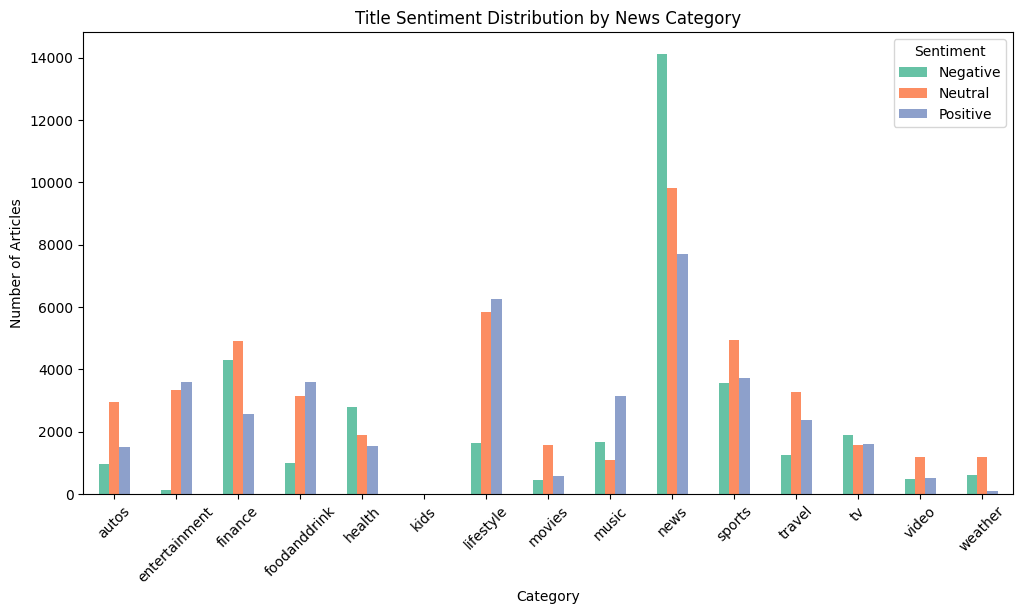

In [294]:
# Title Sentiment Distribution by News Category
category_sentiment_counts_title = merged_null_df.groupby(['Category_y', 'Title_Sentiment']).size().unstack()
colors = ['#66c2a5', '#fc8d62', '#8da0cb'] 
category_sentiment_counts_title.plot(kind='bar', color=colors, stacked=False, figsize=(12, 6))
plt.title('Title Sentiment Distribution by News Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()


**Word Cloud by Title Sentiment**

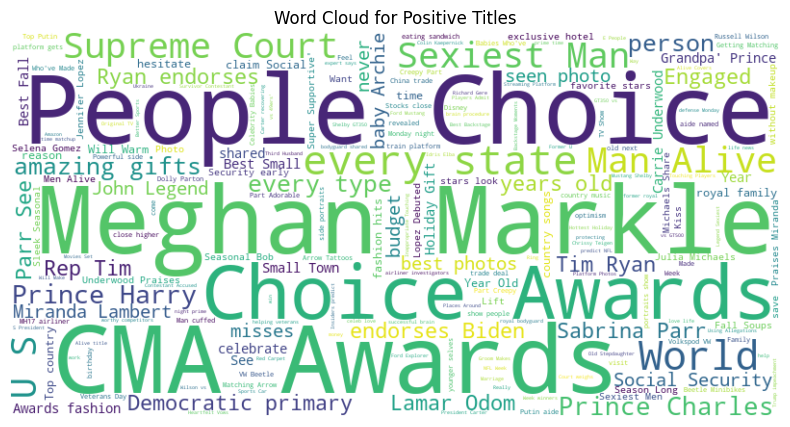

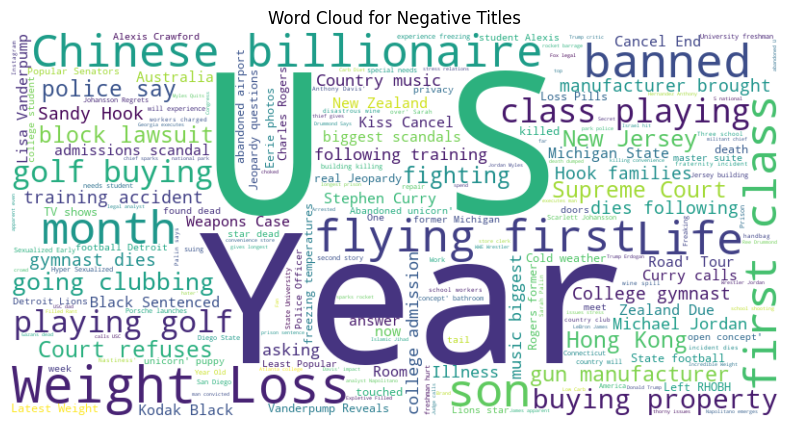

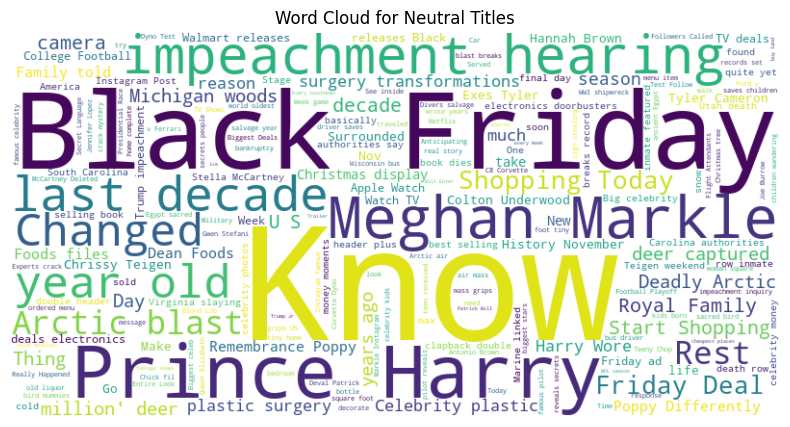

In [295]:
# Generate word clouds for Title sentiments
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(merged_null_df[merged_null_df['Title_Sentiment'] == sentiment]['Title_y'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Titles')
    plt.show()


## **Sana Code 2:** Abstract Sentiment Analysis

**Drop NaN Values**

In [296]:
# Remove NaN values in Abstract column
merged_null_df2 = merged_null_df.dropna(subset=['Abstract_y'])

**Sentiment Scoring for Abstracts**

In [297]:
# Sentiment function for Abstract
def get_sentiment(text):
    score = analyzer.polarity_scores(text) 
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

merged_null_df2['Abstract_Sentiment'] = merged_null_df2['Abstract_y'].apply(get_sentiment)

/var/folders/6j/3xbqy_ss7d12n5z58vw1xq2r0000gn/T/ipykernel_75177/3294462057.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_null_df2['Abstract_Sentiment'] = merged_null_df2['Abstract_y'].apply(get_sentiment)


**Calculate Click-Through Rate (CTR) by Abstract Sentiment**

In [298]:
# Calculate CTR for each abstract sentiment category
ctr_by_abstract_sentiment = merged_null_df2.groupby('Abstract_Sentiment').apply(lambda x: x['Impressions'].sum() / len(x)).reset_index()
ctr_by_abstract_sentiment.columns = ['Abstract_Sentiment', 'CTR']

print(ctr_by_abstract_sentiment)


  Abstract_Sentiment       CTR
0           Negative  0.049965
1            Neutral  0.041478
2           Positive  0.032222


**Sentiment Distribution by Category (Abstract)**

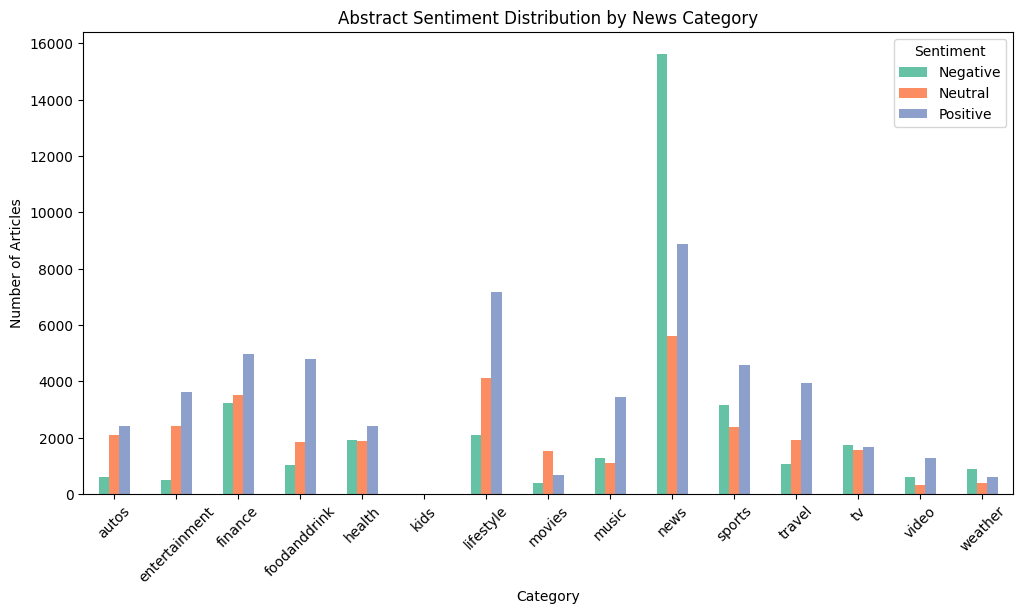

In [299]:
# Abstract Sentiment Distribution by News Category
category_sentiment_counts_abstract = merged_null_df2.groupby(['Category_y', 'Abstract_Sentiment']).size().unstack()
colors = ['#66c2a5', '#fc8d62', '#8da0cb'] 
category_sentiment_counts_abstract.plot(kind='bar', color=colors, stacked=False, figsize=(12, 6))
plt.title('Abstract Sentiment Distribution by News Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()


**Word Cloud by Abstract Sentiment**

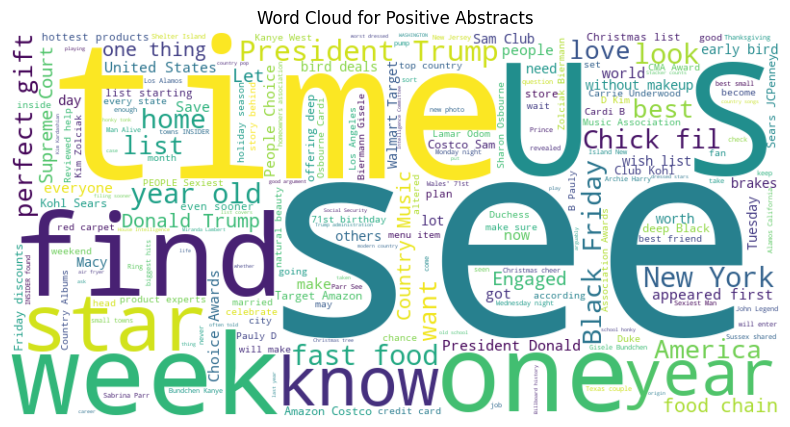

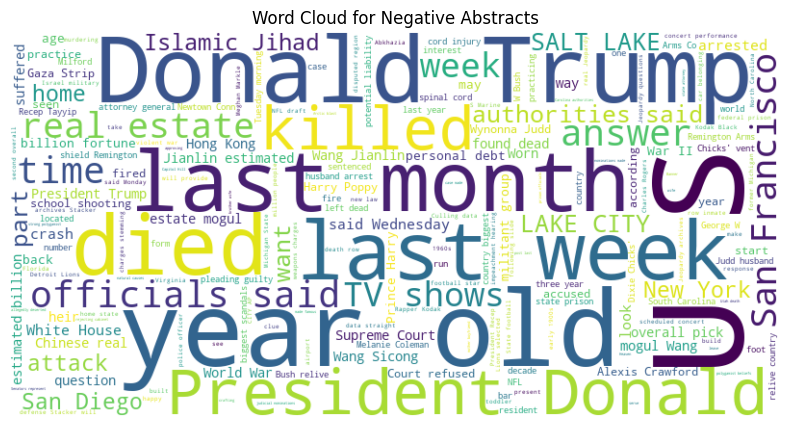

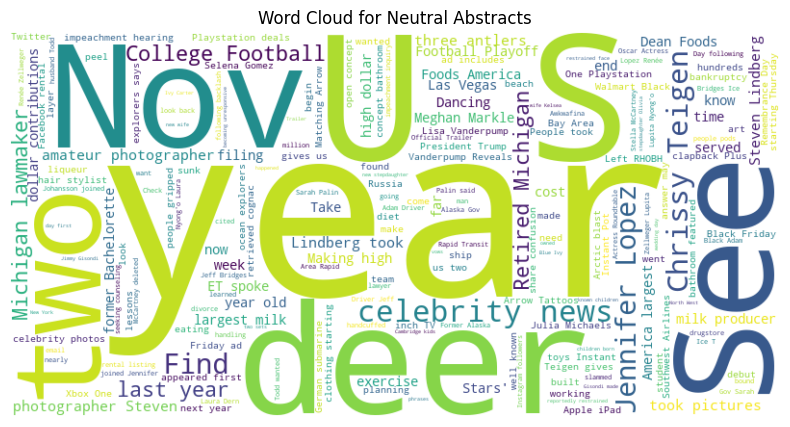

In [300]:
# Generate word clouds for Abstract sentiments
for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = ' '.join(merged_null_df2[merged_null_df2['Abstract_Sentiment'] == sentiment]['Abstract_y'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Abstracts')
    plt.show()


# **Low History Threshold**

## Calculate the unique history counts (number of unique News_IDs) per User ID

In [118]:
user_history_counts = merged_df.groupby('User ID')['News_ID'].nunique().reset_index()
user_history_counts.columns = ['User_ID', 'History_Count']

# Display the resulting dataframe
print(user_history_counts.head())

  User_ID  History_Count
0    U100             10
1   U1000              3
2  U10001             15
3  U10003              8
4  U10008             23


## Create a histogram of History_Count

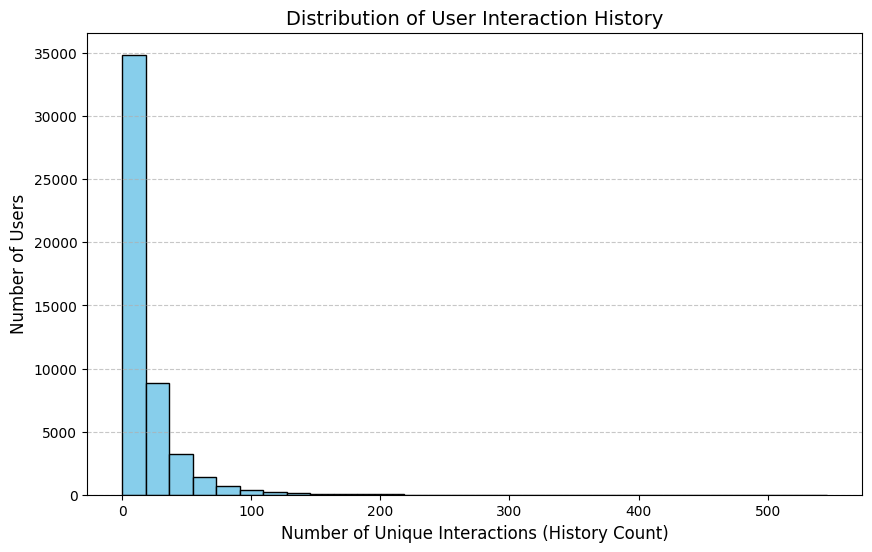

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(user_history_counts['History_Count'], bins=30, edgecolor='k', color='skyblue')
plt.title("Distribution of User Interaction History", fontsize=14)
plt.xlabel("Number of Unique Interactions (History Count)", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## CTR for each user

In [120]:
# Function to count clicked items (-1)
def count_clicks(impressions):
    return sum(1 for item in impressions.split() if item.endswith('-1'))

# Function to count total impressions
def count_total_impressions(impressions):
    return len(impressions.split())

# Apply to calculate `Click` and `Total_Impressions`
merged_df['Click'] = merged_df['Impressions'].apply(count_clicks)
merged_df['Total_Impressions'] = merged_df['Impressions'].apply(count_total_impressions)

# Verify counts
print(merged_df[['Impressions', 'Click', 'Total_Impressions']].head())

# Group by User ID to calculate CTR
user_ctr = merged_df.groupby('User ID').apply(
    lambda x: x['Click'].sum() / x['Total_Impressions'].sum() if x['Total_Impressions'].sum() > 0 else 0
).reset_index()
user_ctr.columns = ['User_ID', 'CTR']

# print(merged_df[['Impressions', 'Click', 'Total_Impressions']].head())
print(user_ctr.head())


         Impressions  Click  Total_Impressions
0  N55689-1 N35729-0      1                  2
1  N55689-1 N35729-0      1                  2
2  N55689-1 N35729-0      1                  2
3  N55689-1 N35729-0      1                  2
4  N55689-1 N35729-0      1                  2
  User_ID       CTR
0    U100  0.009524
1   U1000  0.019512
2  U10001  0.035714
3  U10003  0.028302
4  U10008  0.013889


## Scatter plot of History Count vs. CTR

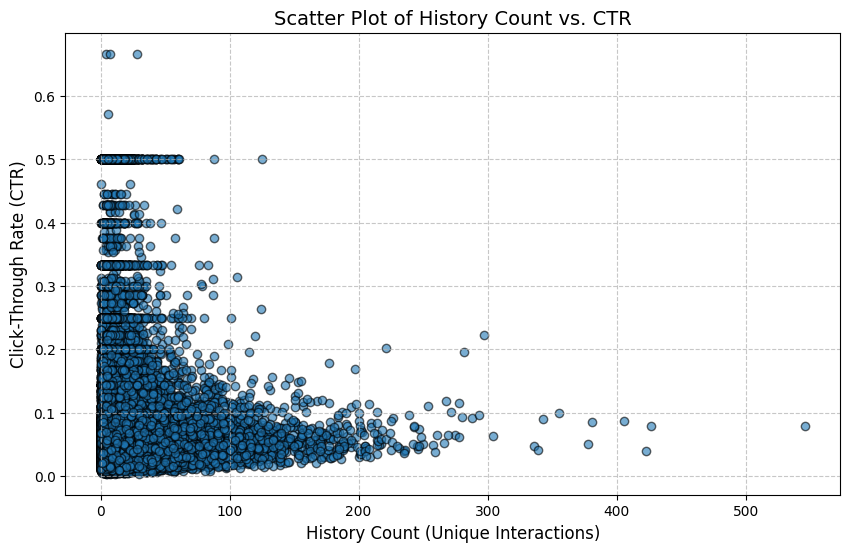

In [121]:
import matplotlib.pyplot as plt

# Merge the history count data with the user CTR data
user_data = pd.merge(user_history_counts, user_ctr, on='User_ID')

plt.figure(figsize=(10, 6))
plt.scatter(user_data['History_Count'], user_data['CTR'], alpha=0.6, edgecolors='k')
plt.title("Scatter Plot of History Count vs. CTR", fontsize=14)
plt.xlabel("History Count (Unique Interactions)", fontsize=12)
plt.ylabel("Click-Through Rate (CTR)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## History & Impression Counts

In [122]:
# Calculate Total History Counts (unique News_IDs) per User
user_history_counts = merged_df.groupby('User ID')['News_ID'].nunique().reset_index()
user_history_counts.columns = ['User_ID', 'Total_History_Count']
print("Total History Counts per User:")
print(user_history_counts.head())

# Calculate Total Impression Counts per User
user_impressions = merged_df.groupby('User ID')['Impressions'].apply(lambda x: sum(len(i.split()) for i in x)).reset_index()
user_impressions.columns = ['User_ID', 'Total_Impression_Count']
print("\nTotal Impression Counts per User:")
print(user_impressions.head())


Total History Counts per User:
  User_ID  Total_History_Count
0    U100                   10
1   U1000                    3
2  U10001                   15
3  U10003                    8
4  U10008                   23

Total Impression Counts per User:
  User_ID  Total_Impression_Count
0    U100                    1050
1   U1000                     615
2  U10001                    1260
3  U10003                     848
4  U10008                    1656


## Heatmap

/var/folders/6j/3xbqy_ss7d12n5z58vw1xq2r0000gn/T/ipykernel_9994/1778204257.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = user_data.groupby(['History_Bin', 'Impressions_Bin'])['CTR'].mean().unstack()


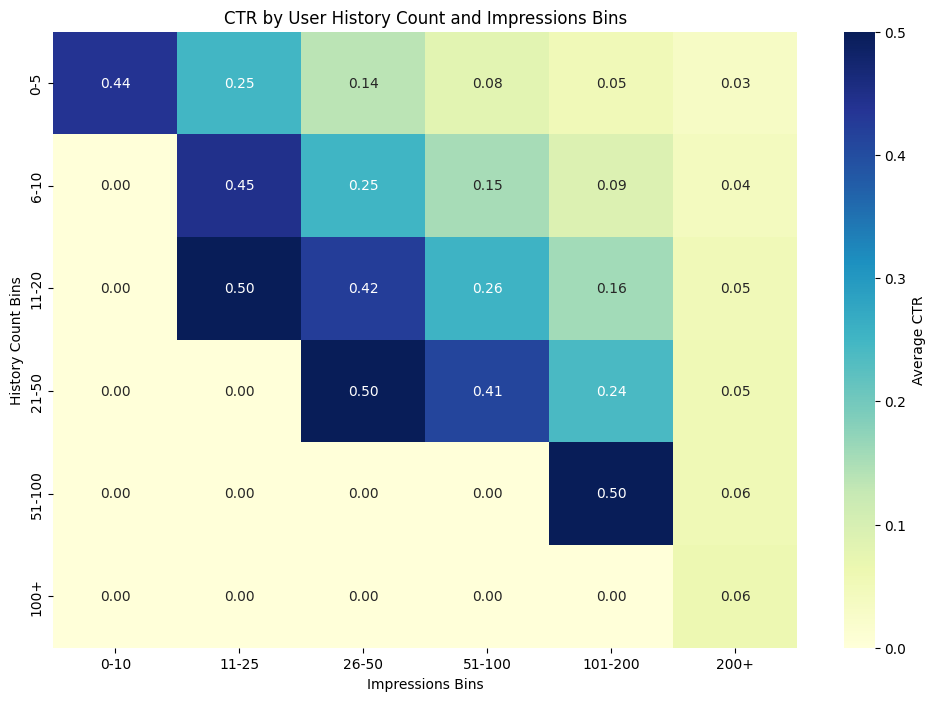

In [123]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define Bins for History Count and Impressions
history_bins = [0, 5, 10, 20, 50, 100, user_history_counts['Total_History_Count'].max()]
history_labels = ['0-5', '6-10', '11-20', '21-50', '51-100', '100+']
user_history_counts['History_Bin'] = pd.cut(user_history_counts['Total_History_Count'], bins=history_bins, labels=history_labels, include_lowest=True)

impression_bins = [0, 10, 25, 50, 100, 200, user_impressions['Total_Impression_Count'].max()]
impression_labels = ['0-10', '11-25', '26-50', '51-100', '101-200', '200+']
user_impressions['Impressions_Bin'] = pd.cut(user_impressions['Total_Impression_Count'], bins=impression_bins, labels=impression_labels, include_lowest=True)

# Step 2: Merge the DataFrames
user_data = pd.merge(user_history_counts, user_impressions, on='User_ID')
user_data = pd.merge(user_data, user_ctr, on='User_ID')

# Step 3: Create the Heatmap Data
heatmap_data = user_data.groupby(['History_Bin', 'Impressions_Bin'])['CTR'].mean().unstack()
heatmap_data = heatmap_data.fillna(0)  # Fill missing values with 0

# Step 4: Plot the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Average CTR'})
plt.title("CTR by User History Count and Impressions Bins")
plt.xlabel("Impressions Bins")
plt.ylabel("History Count Bins")
plt.xticks(rotation=0)
plt.show()


In [124]:
print(heatmap_data)

Impressions_Bin      0-10     11-25     26-50    51-100   101-200      200+
History_Bin                                                                
0-5              0.437743  0.248370  0.135514  0.081218  0.052664  0.032149
6-10             0.000000  0.446853  0.251796  0.152609  0.091365  0.042152
11-20            0.000000  0.500000  0.423810  0.255135  0.157019  0.051591
21-50            0.000000  0.000000  0.500000  0.410256  0.242097  0.054757
51-100           0.000000  0.000000  0.000000  0.000000  0.500000  0.056124
100+             0.000000  0.000000  0.000000  0.000000  0.000000  0.061118


# **Do Certain Types of Content Consistently Receive Higher Attention Weights across Users?**

Based on the heatmap, users with low history should have a history count of **5 or fewer unique interactions**. This is because users in the 0-5 history count bin consistently show lower CTRs across all impression bins compared to users with more history (e.g., 6-10 or 11-20), which suggests that these users are not yet fully engaged with the recommendation system.

Once users move into the 6-10 history count bin, their CTRs begin to improve (as seen in the heatmap), particularly for impression bins 11-25 and beyond. This indicates that engagement increases when users have interacted with more content. So by focusing on users with 5 or fewer history counts, we can identify and optimize the system specifically for new or barely engaged users.



In [113]:
# Step 2: Merge the calculated metrics into merged_df
filtered_user_data = pd.merge(user_history_counts, user_impressions, on='User_ID')

# Step 3: Filter users meeting the conditions
filtered_users = filtered_user_data[(filtered_user_data['Total_History_Count'] <= 5) & (filtered_user_data['Total_Impression_Count'] <= 10)]

# Step 4: Filter merged_df based on the filtered users
filtered_merged_df = merged_df[merged_df['User ID'].isin(filtered_users['User_ID'])]

# Display the filtered dataframe
filtered_merged_df.head()
print(f"Number of rows in filtered dataframe: {filtered_merged_df.shape[0]}")

Number of rows in filtered dataframe: 2900


In [114]:
filtered_merged_df.head()

,Impression ID,User ID,Time,News_ID,Impressions,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities,Click,Total_Impressions,Clicks
3574,95,U85027,11/13/2019 12:02:01 PM,N61864,N51048-0 N28072-1,news,newsopinion,The News In Cartoons,News as seen through the eyes of the nation's ...,https://assets.msn.com/labs/mind/AABGTFJ.html,[],[],1,2,1
3575,95,U85027,11/13/2019 12:02:01 PM,N28501,N51048-0 N28072-1,video,animals,Confused dog can't find hiding kitten,"This dog is looking everywhere for the cat, bu...",https://assets.msn.com/labs/mind/AAIDXoX.html,[],[],1,2,1
3576,95,U85027,11/13/2019 12:02:01 PM,N30145,N51048-0 N28072-1,foodanddrink,restaurantsandnews,10 chain restaurants with special menu items f...,"When ordering your own food, you can also trea...",https://assets.msn.com/labs/mind/AAFRdIs.html,[],[],1,2,1
8363,231,U45170,11/14/2019 4:23:34 PM,N59704,N61233-1 N61740-0,news,newscrime,"California sheriff's deputy shot dead, ride-al...",A police officer in Northern California was ki...,https://assets.msn.com/labs/mind/AAJe6T4.html,"[{""Label"": ""Sheriff"", ""Type"": ""C"", ""WikidataId...",[],1,2,1
8364,231,U45170,11/14/2019 4:23:34 PM,N42394,N61233-1 N61740-0,news,newsus,Sinkhole Swallows Port Authority Bus On Busy S...,A massive sinkhole opened up in downtown Pitts...,https://assets.msn.com/labs/mind/AAJsIjq.html,"[{""Label"": ""Port Authority of Allegheny County...","[{""Label"": ""Port Authority of Allegheny County...",1,2,1


In [115]:
print(filtered_merged_df['Click'].value_counts())


Click
1    2894
2       6
Name: count, dtype: int64


In [111]:
filtered_user_data.head()

,User_ID,Total_History_Count,History_Bin,Total_Impression_Count,Impressions_Bin
0,U100,10,6-10,1050,200+
1,U1000,3,0-5,615,200+
2,U10001,15,11-20,1260,200+
3,U10003,8,6-10,848,200+
4,U10008,23,21-50,1656,200+


# **Testing on Low-History Users**

Low-history users represent those with minimal interaction data, which typically makes it harder for recommendation models to personalize effectively. Testing the LSTUR model on low_history_impressions_df allows us to:

1. **Evaluate Personalization Quality:** Determine if the model can still recommend relevant content despite limited user data.

2. **Assess Fairness and Diversity:** Ensure the model doesn't overfit to a few preferences or reinforce echo chambers but instead provides varied and balanced recommendations.

3. **Improve Cold-Start Handling:** Identify areas where the model can be fine-tuned for users with sparse history, addressing the common "cold-start" problem in recommendation systems.

## Training Model Weights

## saving model weights

In [255]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the NewsEncoder and UserEncoder to ensure compatibility
class NewsEncoder(nn.Module):
    def __init__(self, embedding_dim, attention_dim):
        super(NewsEncoder, self).__init__()
        self.linear = nn.Linear(embedding_dim, attention_dim)

    def forward(self, x):
        return self.linear(x)  # Output shape will be (batch_size, attention_dim)

class UserEncoder(nn.Module):
    def __init__(self, attention_dim):
        super(UserEncoder, self).__init__()
        self.linear = nn.Linear(attention_dim, attention_dim)  # Ensuring output dimension matches attention_dim

    def forward(self, history_encoded):
        # Assuming history_encoded has shape (num_interactions, attention_dim)
        # Take the mean across interactions
        user_representation = torch.mean(history_encoded, dim=0, keepdim=True)  # Shape becomes (1, attention_dim)
        return self.linear(user_representation)  # Output shape will be (1, attention_dim)

# Define the LSTUR Model
class LSTUR(nn.Module):
    def __init__(self, embedding_dim, attention_dim):
        super(LSTUR, self).__init__()
        self.news_encoder = NewsEncoder(embedding_dim, attention_dim)
        self.user_encoder = UserEncoder(attention_dim)
        self.dot_product = nn.CosineSimilarity(dim=1)

    def forward(self, user_id, history, candidate_news):
        # Encode history (shape: num_interactions x embedding_dim)
        history_encoded = self.news_encoder(history)  # Shape: (num_interactions, attention_dim)
        
        # Encode user based on history
        user_representation = self.user_encoder(history_encoded)  # Shape: (1, attention_dim)
        
        # Encode candidate news
        candidate_news_encoded = self.news_encoder(candidate_news.unsqueeze(0))  # Shape: (1, attention_dim)
        
        # Compute similarity
        score = self.dot_product(user_representation, candidate_news_encoded)
        return score

# Define model parameters
embedding_dim = 300  # Example dimension for embeddings
attention_dim = 128  # Example attention dimension

# Initialize the model
lstur_model = LSTUR(embedding_dim, attention_dim)

# Dummy data for testing
dummy_user_id = torch.tensor([1])  # Not used in computation; only a placeholder for structure
dummy_history = torch.rand(5, embedding_dim)  # 5 interactions with `embedding_dim` dimensions
dummy_candidate_news = torch.rand(embedding_dim)  # Single candidate news embedding

# Model in training mode
lstur_model.train()

# Define loss and optimizer
criterion = nn.MSELoss()  # Placeholder for demonstration
optimizer = optim.Adam(lstur_model.parameters(), lr=0.001)

# Training step (one forward-backward pass)
optimizer.zero_grad()

try:
    # Forward pass
    scores = lstur_model(dummy_user_id, dummy_history, dummy_candidate_news)
    
    # Dummy target
    target = torch.tensor([1.0])  # Assumes target is a similarity score
    
    # Calculate loss
    loss = criterion(scores, target)
    loss.backward()  # Backward pass
    optimizer.step()  # Update weights

    # Save the model weights
    torch.save(lstur_model.state_dict(), "lstur_model_weights.pth")
    print("Model weights saved as 'lstur_model_weights.pth'")
except Exception as e:
    print(f"Error during model training: {e}")


Model weights saved as 'lstur_model_weights.pth'


In [260]:
# --- Step 1: Recreate History Column ---
# Use `groupby` and `apply` instead of `transform` to ensure proper alignment
if 'History' not in merged_null_df.columns:
    user_histories = (
        merged_null_df.groupby('User ID')['News_ID']
        .apply(lambda x: list(x.unique()))
        .reset_index()
        .rename(columns={'News_ID': 'History'})
    )
    # Merge the reconstructed History back into the original dataframe
    merged_null_df = merged_null_df.merge(user_histories, on='User ID', how='left')

# --- Step 2: Sum the Impressions and Calculate History Counts ---
low_history_impressions_df = merged_null_df.copy()

# Sum impressions and calculate history counts
low_history_impressions_df['Total_Impressions'] = low_history_impressions_df.groupby('User ID')['Impressions'].transform('sum')
low_history_impressions_df['History_Count'] = low_history_impressions_df.groupby('User ID')['News_ID'].transform('nunique')

# Filter for low history and impressions users
low_history_impressions_df = low_history_impressions_df[
    (low_history_impressions_df['History_Count'] <= 5) &
    (low_history_impressions_df['Total_Impressions'] <= 7)
]

# Ensure `History` is in list format
low_history_impressions_df['History'] = low_history_impressions_df['History'].apply(lambda x: eval(str(x)) if isinstance(x, str) else x)

# Confirm the new dataframe structure
print(low_history_impressions_df.head())


       Impression ID User ID                    Time News_ID  Impressions  \
5108            6139   U6968  11/11/2019 11:57:54 AM  N55689            0   
5109            6139   U6968  11/11/2019 11:57:54 AM  N53585            1   
8922           11255  U69581  11/14/2019 11:44:17 PM  N55322            0   
8923           11255  U69581  11/14/2019 11:44:17 PM  N12330            1   
13101          16613  U47649  11/14/2019 12:08:57 PM  N23535            1   

         Category_y       SubCategory_y  \
5108         sports        football_nfl   
5109             tv              tvnews   
8922           news              newsus   
8923           news        newspolitics   
13101  foodanddrink  restaurantsandnews   

                                                 Title_y  \
5108   Charles Rogers, former Michigan State football...   
5109   Rip Taylor's Cause of Death Revealed, Memorial...   
8922   Border officials: "Consequences" deterring mig...   
8923   Pompeo 'on shifting sand' as im

In [267]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

# --- Step 1: Ensure Proper Data Types ---

# Convert `User ID` to numeric (if possible)
low_history_impressions_df['User ID'] = pd.to_numeric(low_history_impressions_df['User ID'], errors='coerce')

# Ensure `History` is a list of strings
low_history_impressions_df['History'] = low_history_impressions_df['History'].apply(
    lambda x: [str(item) for item in x] if isinstance(x, list) else []
)

# Ensure `News_ID` is treated as a string
low_history_impressions_df['News_ID'] = low_history_impressions_df['News_ID'].apply(str)

# Ensure `Click` is numeric
low_history_impressions_df['Click'] = pd.to_numeric(low_history_impressions_df['Click'], errors='coerce')

# Drop rows with any invalid data
low_history_impressions_df = low_history_impressions_df.dropna()

# --- Step 2: Dataset Preparation ---

class LowHistoryDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        user_id = torch.tensor([row['User ID']], dtype=torch.float32)  # Numeric user ID
        history = torch.tensor([int(news_id.split('N')[1]) for news_id in row['History']], dtype=torch.long)
        candidate_news = torch.tensor([int(row['News_ID'].split('N')[1])], dtype=torch.long)
        label = torch.tensor([row['Click']], dtype=torch.float32)  # Click label
        return user_id, history, candidate_news, label

# Create the dataset and dataloader
low_history_dataset = LowHistoryDataset(low_history_impressions_df)
low_history_dataloader = DataLoader(low_history_dataset, batch_size=32, shuffle=True)

# --- Step 3: Verify Dataset ---
for batch in low_history_dataloader:
    user_id, history, candidate_news, label = batch
    print("User IDs:", user_id)
    print("History:", history)
    print("Candidate News:", candidate_news)
    print("Labels:", label)
    break  # Print one batch and stop

# --- Step 4: Train the Model ---

# Define the LSTUR model (reuse your existing definition)
class LSTUR(torch.nn.Module):
    def __init__(self, embedding_dim, attention_dim, user_dim):
        super(LSTUR, self).__init__()
        self.news_encoder = torch.nn.Embedding(10000, embedding_dim)  # Dummy embedding
        self.user_encoder = torch.nn.Linear(embedding_dim, user_dim)
        self.attention = torch.nn.MultiheadAttention(embed_dim=embedding_dim, num_heads=1)
        self.final_linear = torch.nn.Linear(user_dim, embedding_dim)

    def forward(self, user_id, history, candidate_news):
        history_embeddings = self.news_encoder(history)
        candidate_embeddings = self.news_encoder(candidate_news)
        history_representation, _ = self.attention(candidate_embeddings, history_embeddings, history_embeddings)
        user_representation = self.user_encoder(history_representation.mean(dim=1))
        score = torch.cosine_similarity(user_representation, candidate_embeddings.squeeze(1), dim=1)
        return score

# Instantiate the model
embedding_dim = 128
attention_dim = 64
user_dim = 128
lstur_model = LSTUR(embedding_dim, attention_dim, user_dim)

# Training setup
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstur_model.parameters(), lr=0.001)

# Training loop (simplified for testing purposes)
lstur_model.train()
for epoch in range(1):  # One epoch for demonstration
    total_loss = 0.0
    for batch in low_history_dataloader:
        user_id, history, candidate_news, label = batch
        optimizer.zero_grad()
        scores = lstur_model(user_id, history, candidate_news)
        loss = criterion(scores, label.squeeze(1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss}")

# --- Step 5: Save Model Weights ---
torch.save(lstur_model.state_dict(), "lstur_model_low_history.pth")
print("Model weights saved successfully.")


ValueError: num_samples should be a positive integer value, but got num_samples=0

# **Average Attention Weights by Sentiment**

**Short Blurb:** 

Attention in machine learning is like a spotlight that helps the model focus on the most important parts of the data when making decisions. In the LSTUR model, attention helps the model decide which news articles or parts of a user’s reading history matter most when recommending new articles. 

I wanted to dive a bit deeper into this concept, and thought it was important because it shows us what the model values in its recommendations—whether it focuses on certain types of content, tones, or topics. Thus by analyzing attention, we can see if the model might be biased towards specific kinds of information, which is essential for understanding and improving the fairness of recommendations.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

class NewsEncoder(nn.Module):
    def __init__(self, embedding_dim=100, attention_dim=50):
        super(NewsEncoder, self).__init__()
        self.attention = nn.Linear(embedding_dim, attention_dim)
        self.context_vector = nn.Linear(attention_dim, 1, bias=False)
        
    def forward(self, x):
        x = x.float()  # Ensure the input is in float32
        attention_scores = torch.tanh(self.attention(x))
        attention_weights = torch.softmax(self.context_vector(attention_scores), dim=1)
        news_representation = (attention_weights * x).sum(dim=1)
        return news_representation, attention_weights  # Return both representation and weights


In [ ]:
class LSTUR(nn.Module):
    def __init__(self, embedding_dim, attention_dim, user_dim):
        super(LSTUR, self).__init__()
        self.news_encoder = NewsEncoder(embedding_dim, attention_dim)
        self.user_encoder = nn.Linear(embedding_dim, user_dim)
    
    def dot_product(self, user_representation, candidate_news_representation):
        return torch.sum(user_representation * candidate_news_representation, dim=1)
    
    def forward(self, user_id, history, candidate_news):
        history_encoded, attention_weights = self.news_encoder(history.float())  # Convert to float32 if needed
        candidate_news_encoded, _ = self.news_encoder(candidate_news.float())
        user_representation = self.user_encoder(history_encoded)
        score = self.dot_product(user_representation, candidate_news_encoded)
        return score, attention_weights


In [ ]:
# Sentiment analysis using VADER
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to titles and abstracts
merged_null_df['Title_Sentiment'] = merged_null_df['Title_y'].apply(get_sentiment)
merged_null_df['Abstract_Sentiment'] = merged_null_df['Abstract_y'].apply(get_sentiment)

# Instantiate LSTUR model and set it to evaluation mode
model = LSTUR(embedding_dim=100, attention_dim=50, user_dim=100)
model.eval()

# Data preparation function
def prepare_input(row):
    user_id = row['User ID']
    history = torch.tensor(np.random.rand(10, 100)).float()  # Convert to float32
    candidate_news = torch.tensor(np.random.rand(1, 100)).float()  # Convert to float32
    label = row['Impressions']  # Click label
    return user_id, history, candidate_news, label

# Run model and capture attention weights with sentiments
attention_data = []

for idx, row in merged_null_df.iterrows():
    user_id, history, candidate_news, label = prepare_input(row)
    
    if user_id is None or history is None or candidate_news is None:
        continue
    
    # Get user and news representations along with attention weights
    score, attention_weights = model(user_id, history.unsqueeze(0), candidate_news.unsqueeze(0))
    
    # Store attention weights and sentiment for analysis
    attention_data.append({
        'Title': row['Title_y'],
        'Attention_Weights': attention_weights.detach().cpu().numpy().tolist(),
        'Title_Sentiment': row['Title_Sentiment'],
        'Abstract_Sentiment': row['Abstract_Sentiment']
    })

# Convert to DataFrame for analysis
attention_df = pd.DataFrame(attention_data)


NameError: name 'merged_null_df' is not defined

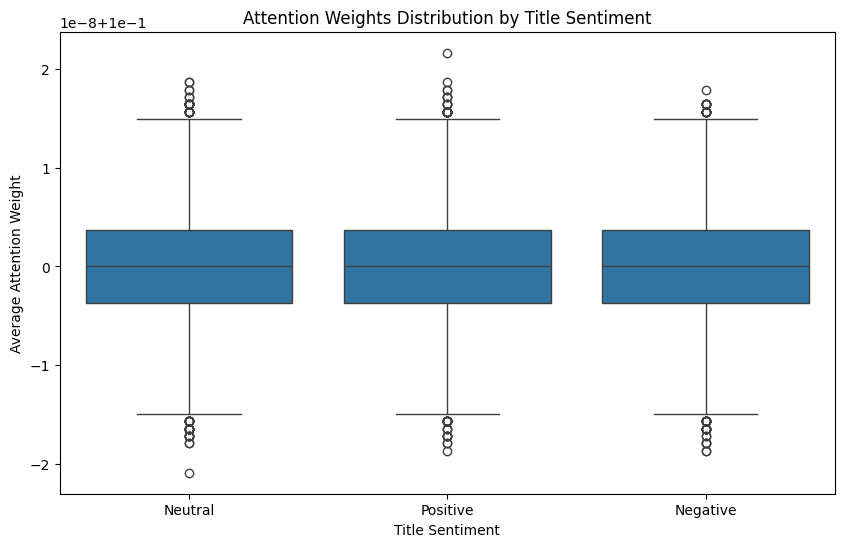

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average attention weight per sentiment
sentiment_attention = attention_df.groupby('Title_Sentiment')['Attention_Weights'].apply(lambda x: np.mean(x.tolist(), axis=0))

# Plot distribution of attention weights by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x=attention_df['Title_Sentiment'], y=attention_df['Attention_Weights'].apply(np.mean))
plt.title('Attention Weights Distribution by Title Sentiment')
plt.xlabel('Title Sentiment')
plt.ylabel('Average Attention Weight')
plt.show()


In [ ]:
# Calculate average attention weight per sentiment
sentiment_attention = attention_df.groupby('Title_Sentiment')['Attention_Weights'].apply(lambda x: np.mean(x.tolist(), axis=0))

# Print the results for each sentiment category
print("Average Attention Weights by Sentiment:")
for sentiment, weights in sentiment_attention.items():
    print(f"\nSentiment: {sentiment}")
    print("Average Attention Weights:", weights)


Average Attention Weights by Sentiment:

Sentiment: Negative
Average Attention Weights: [[[0.10002195]
  [0.10007481]
  [0.10008735]
  [0.09993661]
  [0.10000477]
  [0.10004314]
  [0.10004491]
  [0.09993232]
  [0.09991427]
  [0.09993987]]]

Sentiment: Neutral
Average Attention Weights: [[[0.09991975]
  [0.10002568]
  [0.10000213]
  [0.10000701]
  [0.10001965]
  [0.09999665]
  [0.10001347]
  [0.10005646]
  [0.10000169]
  [0.09995751]]]

Sentiment: Positive
Average Attention Weights: [[[0.09993148]
  [0.10002877]
  [0.0999694 ]
  [0.10009163]
  [0.10006463]
  [0.10000701]
  [0.10000322]
  [0.09994244]
  [0.10002561]
  [0.0999358 ]]]


In [ ]:
# Convert the results to a DataFrame and save as CSV
sentiment_attention_df = pd.DataFrame(sentiment_attention).reset_index()
sentiment_attention_df.columns = ['Sentiment', 'Average_Attention_Weights']
sentiment_attention_df.to_csv('average_attention_weights_by_sentiment.csv', index=False)

print("Results saved to 'average_attention_weights_by_sentiment.csv'")


Results saved to 'average_attention_weights_by_sentiment.csv'


## **Results**

These results show how much attention the model gives to different parts (or "tokens") of the news articles, depending on the sentiment of the article (Negative, Neutral, or Positive). The attention weights are values between 0 and 1 that indicate how important each word or token is when the model makes a recommendation.

**For Negative Sentiment:** The attention weights for Negative articles are close to each other, mostly around 0.10. This suggests that the model treats each part of these articles fairly equally, without giving one part much more importance than another.

**For Neutral Sentiment:** The Neutral sentiment also shows weights close to 0.10, similar to the Negative sentiment. This indicates that the model’s focus is distributed evenly across the article parts here too, without concentrating on any specific section.

**For Positive Sentiment:** The Positive sentiment articles have weights close to 0.10 as well, and, like the other sentiments, the model doesn’t seem to emphasize any specific part of the article more than others.

**Overall Insight:** The similarity in attention weights across all sentiments (all close to 0.10) suggests that the model is treating each part of the articles relatively equally, regardless of the sentiment. This could mean that the model isn’t particularly biased toward any one part of the article, whether it’s Negative, Neutral, or Positive. In a recommendation context, this balance is generally good, as it indicates that the model is not overly favoring or ignoring specific words or phrases based on sentiment alone.

# **Are Recommendations Skewed For Some Users vs Others?**

So the first thing I am doing is using the model to simulate recommendations for a set of users, and running the LSTUR model on each user’s history to get recommended articles (or a set of scores for candidate articles). These recommendations are then stored by category and sentiment for each user.

After generating recommendations, I analyzed the diversity in categories and sentiments for each user, just as before. This helps to see if the model itself is skewing recommendations toward specific topics or tones for different users.

### Sample CSV

In [ ]:
import pandas as pd
import torch
import numpy as np

# Initialize storage for a small sample of recommendations
sample_recommendation_data = []

# Set the number of users to sample
num_users_sample = 5  # Adjust to capture the first 5 users' data, for example

# Path to save the sample CSV
sample_save_path = 'sample_recommendation_diversity.csv'

# Loop through only a small subset of users in merged_null_df
for idx, user_id in enumerate(merged_null_df['User ID'].unique()[:num_users_sample]):
    # Select the user's history
    user_history = merged_null_df[merged_null_df['User ID'] == user_id]
    history_vector = torch.tensor(np.random.rand(len(user_history), 100)).float()  # Replace with actual user history embeddings

    # Generate a few sample recommendations per user
    for candidate_news in merged_null_df['News_ID'].unique()[:20]:  # Limit to 20 articles per user for quick analysis
        candidate_vector = torch.tensor(np.random.rand(1, 100)).float()  # Replace with candidate news embedding
        _, attention_weights = model(user_id, history_vector.unsqueeze(0), candidate_vector.unsqueeze(0))
        
        # Retrieve category and sentiment for each recommended article
        candidate_category = merged_null_df[merged_null_df['News_ID'] == candidate_news]['Category_y'].values[0]
        candidate_sentiment = get_sentiment(merged_null_df[merged_null_df['News_ID'] == candidate_news]['Title_y'].values[0])
        
        # Store recommendation data
        sample_recommendation_data.append({
            'User ID': user_id,
            'News ID': candidate_news,
            'Category': candidate_category,
            'Sentiment': candidate_sentiment,
            'Attention_Weights': attention_weights.detach().cpu().numpy().tolist()
        })

# Convert to a DataFrame and save as a CSV
sample_df = pd.DataFrame(sample_recommendation_data)
sample_df.to_csv(sample_save_path, index=False)

print(f"Sample of results saved to '{sample_save_path}' for quick analysis.")

In [ ]:
import pandas as pd
import ast

# Load the sample CSV
sample_df = pd.read_csv('sample_recommendation_diversity.csv')

# Convert attention weights from string to list format if needed
sample_df['Attention_Weights'] = sample_df['Attention_Weights'].apply(ast.literal_eval)

# Function to flatten the attention weights and calculate the average
def calculate_average_attention(weights):
    flattened_weights = [item for sublist in weights for item in sublist]  # Flatten the list
    flattened_weights = [item[0] if isinstance(item, list) else item for item in flattened_weights]  # Flatten further if needed
    return sum(flattened_weights) / len(flattened_weights) if flattened_weights else 0

# Apply the function to calculate average attention weight for each row
sample_df['Average_Attention_Weight'] = sample_df['Attention_Weights'].apply(calculate_average_attention)

# Drop the detailed attention weights column to simplify data (optional)
sample_df = sample_df.drop(columns=['Attention_Weights'])

# Save the simplified version with average attention weights
sample_df.to_csv('sample_recommendation_avg_attention.csv', index=False)

print("Average attention weights saved to 'sample_recommendation_avg_attention.csv'")

# **Do Certain Types of Content Consistently Receive Higher Attention Weights across Users?**

In [ ]:
import pandas as pd

df = pd.read_csv('sample_recommendation_avg_attention.csv')

# Group by Category and Sentiment, then calculate the average attention weight for each group
content_attention = df.groupby(['Category', 'Sentiment'])['Average_Attention_Weight'].mean().reset_index()

# Sort the results to see which content types get higher attention weights
content_attention = content_attention.sort_values(by='Average_Attention_Weight', ascending=False)

content_attention

In looking at the results, we see that all the average attention weights across different types of content (like news, sports, entertainment) and different tones (positive, neutral, or negative) are basically the same. This means the model isn’t giving more “focus” or attention to any particular type of content or sentiment. It’s treating all kinds of articles almost equally, without highlighting any one category or tone more than another.

For our project, where we’re trying to understand if the model might show a bias in what it recommends, these results suggest that the model doesn’t seem to favor one type of content over another based on attention weights alone. In simple terms, the model isn’t “pushing” more attention toward specific categories (like finance over health) or sentiments (like positive over negative) in its recommendations.

This lack of difference could imply a balanced recommendation approach where the model is neutral about what it recommends. However, it might also mean that the model isn’t prioritizing diversity in recommendations, as it’s not differentiating between content types. For our goals, these findings raise questions about whether the model could be more tailored or intentional in how it recommends content based on user interests or diverse viewpoints.

In [ ]:
import pandas as pd

df = pd.read_csv('sample_recommendation_avg_attention.csv')

# Group by Sentiment and calculate the average attention weight for each sentiment
sentiment_attention = df.groupby('Sentiment')['Average_Attention_Weight'].mean().reset_index()

# Sort the results to see if any sentiment gets higher average attention
sentiment_attention = sentiment_attention.sort_values(by='Average_Attention_Weight', ascending=False)

sentiment_attention

In this analysis, we looked at whether the model pays more attention to content with different sentiments (Negative, Neutral, Positive). The results show that the average attention weights for each sentiment are the same. This means that the model doesn't prioritize one type of sentiment over another; it treats all types—whether the sentiment is positive, neutral, or negative—equally.

For our project, where we're examining if the model could be showing any bias in recommendations, these findings suggest that sentiment doesn't influence how much "attention" the model assigns to different pieces of content. Essentially, the model doesn’t seem to push or prioritize any particular sentiment in its recommendations, which could imply a neutral stance in terms of the tone of the content it recommends to users. This could be seen as an indicator that the model is not skewing recommendations based on emotional content, which might be beneficial if our goal is to avoid bias in presenting content.

# **Identifying Users with High vs. Low Attention Weight Spread**

In [ ]:
import pandas as pd
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns

# 'sample_df' is our DataFrame containing 'User ID', 'Category', 'Sentiment', and 'Average_Attention_Weight'

# Step 1: Calculate average attention weight per user
user_avg_attention = sample_df.groupby('User ID')['Average_Attention_Weight'].mean().reset_index()
user_avg_attention.columns = ['User ID', 'Avg_Attention_Weight']

# Step 2: Define high and low attention groups based on median
median_attention = user_avg_attention['Avg_Attention_Weight'].median()
user_avg_attention['Attention_Group'] = user_avg_attention['Avg_Attention_Weight'].apply(
    lambda x: 'High' if x > median_attention else 'Low'
)

# Step 3: Merge attention groups with the original sample data
sample_df = sample_df.merge(user_avg_attention[['User ID', 'Attention_Group']], on='User ID', how='left')

# Step 4: Calculate category and sentiment distribution within each attention group
category_distribution = sample_df.groupby(['Attention_Group', 'Category']).size().unstack().fillna(0)
sentiment_distribution = sample_df.groupby(['Attention_Group', 'Sentiment']).size().unstack().fillna(0)

# Step 5: Measure diversity using entropy
def calculate_entropy(group):
    proportions = group / group.sum()  # Convert counts to proportions
    return entropy(proportions)

# Calculate entropy for categories and sentiments within each attention group
category_entropy = sample_df.groupby('Attention_Group')['Category'].apply(lambda x: calculate_entropy(x.value_counts()))
sentiment_entropy = sample_df.groupby('Attention_Group')['Sentiment'].apply(lambda x: calculate_entropy(x.value_counts()))

# Print entropy values for interpretation
print("Category Diversity (Entropy) by Attention Group:\n", category_entropy)
print("\nSentiment Diversity (Entropy) by Attention Group:\n", sentiment_entropy)

# Print category and sentiment distribution tables
print("\nCategory Distribution by Attention Group:\n", category_distribution)
print("\nSentiment Distribution by Attention Group:\n", sentiment_distribution)

# Step 6: Visualize the Results
# Bar plot of category distribution within high and low attention groups
plt.figure(figsize=(10, 6))
sns.countplot(data=sample_df, x='Category', hue='Attention_Group')
plt.title("Category Distribution by Attention Group")
plt.show()

# Bar plot of sentiment distribution within high and low attention groups
plt.figure(figsize=(10, 6))
sns.countplot(data=sample_df, x='Sentiment', hue='Attention_Group')
plt.title("Sentiment Distribution by Attention Group")
plt.show()


The analysis shows that the model provides a consistent variety of content across different attention groups, suggesting a balanced recommendation approach. First, in terms of content diversity, both high and low attention groups experience similar entropy levels, meaning they receive a comparable mix of categories and sentiments in their recommendations. This indicates that the model does not favor specific types of content or emotional tones for one group over the other, ensuring that all users encounter a balanced array of topics and sentiments.

Looking deeper into category distribution, both high and low attention groups receive a greater proportion of “news” and “entertainment” recommendations, but these categories are evenly spread across both groups. This demonstrates that the model doesn’t push any particular category more to high attention users than to low attention users, maintaining a consistent experience for everyone. Additionally, when examining sentiment distribution, both groups are shown to receive a balanced mix of neutral, positive, and negative content. The model does not appear to disproportionately favor one sentiment over another for either attention group, meaning there is no visible bias toward a certain emotional tone.